<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [10]:
print("✅ Accuracy:", accuracy)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n🧾 Classification Report:\n", class_report)

✅ Accuracy: 0.9473684210526315

📊 Confusion Matrix:
 [[40  3]
 [ 3 68]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



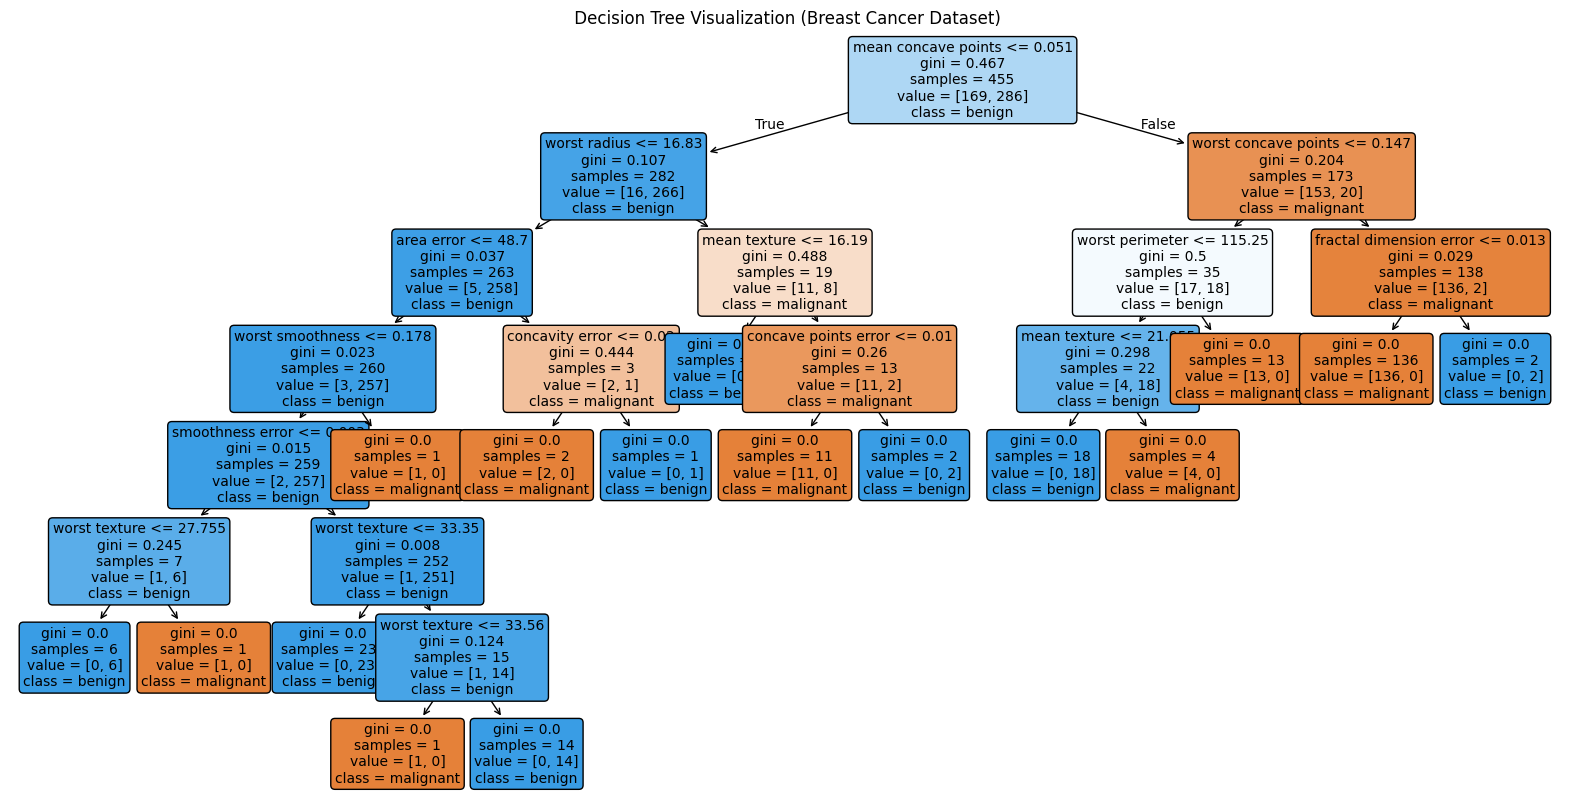

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=['malignant', 'benign'],
          rounded=True,
          fontsize=10)
plt.title(" Decision Tree Visualization (Breast Cancer Dataset)")
plt.show()

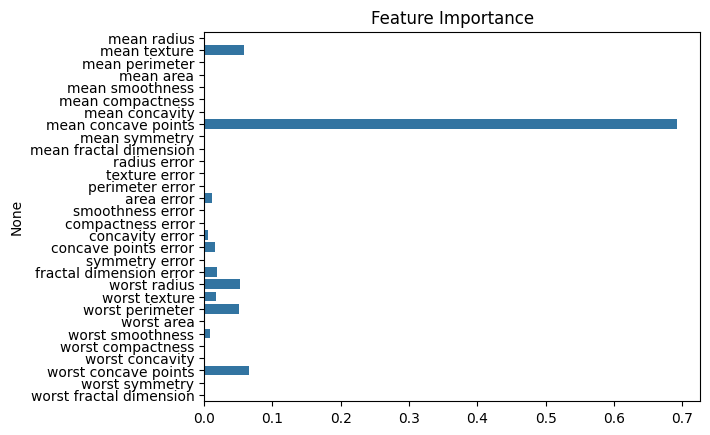

In [12]:
import seaborn as sns
import numpy as np

feat_importance = model.feature_importances_
sns.barplot(x=feat_importance, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [13]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [14]:
model = DecisionTreeClassifier(random_state=42)

In [15]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


In [16]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

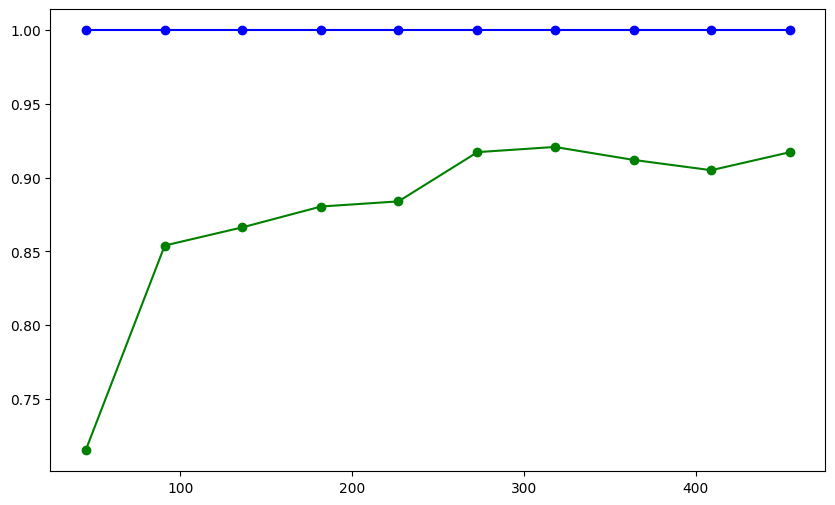

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')

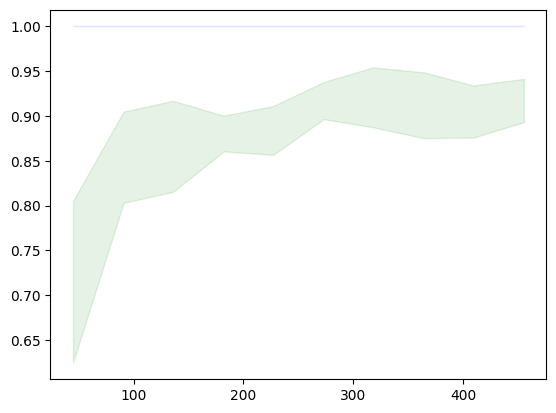

In [18]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

<ipython-input-19-21a8fba6509f>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


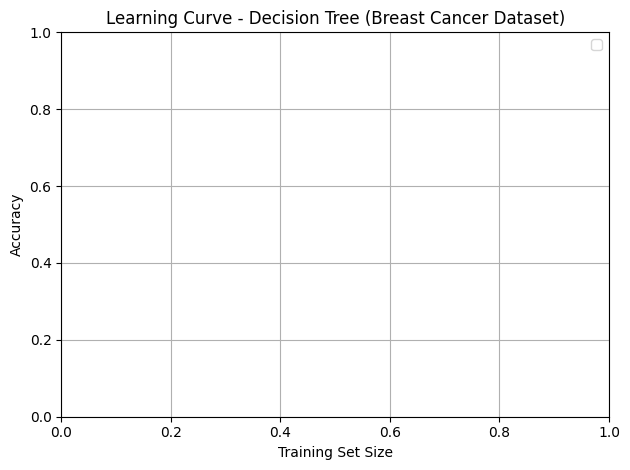

In [19]:
plt.title("Learning Curve - Decision Tree (Breast Cancer Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()